In [25]:
import datetime
from dateutil.relativedelta import relativedelta
#from datetime import timedelta
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

import plotly.plotly as py
import plotly.graph_objs as go

# import plotly.plotly as py
# import plotly.graph_objs as go

In [2]:
dict_dtypes={'BusinessDate': object, 'LocationNo': str}
df_BuyHeaderMetrics = pd.read_csv('./BuyHeaderMetrics.csv', dtype=dict_dtypes, header=0, index_col=0)
df_BuyItemMetrics = pd.read_csv('./BuyItemMetrics.csv', dtype=dict_dtypes, header=0, index_col=0)

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#df_BuyHeaderMetrics.info()

In [4]:
StartDate = '2019-01-01'
filt_DropBeforeStartDate = df_BuyHeaderMetrics['BusinessDate'] < StartDate
df_BuyHeaderMetrics = df_BuyHeaderMetrics.drop(df_BuyHeaderMetrics.index[filt_DropBeforeStartDate], axis=0).reset_index(drop=True)

In [5]:

df_BuyHeaderMetrics['total_BuyWait_Min'] = df_BuyHeaderMetrics['total_BuyWait_Sec']/60
df_BuyHeaderMetrics['rollavg_BuyWait_Min'] = df_BuyHeaderMetrics['rollavg_BuyWait_Sec']/60
df_BuyHeaderMetrics['diff_avg_BuyWait_Min'] = df_BuyHeaderMetrics['diff_avg_BuyWait_Sec']/60


In [6]:
def create_title_str(str_GroupName):
    if str_GroupName == 'v1.r3':
        str_Title = 'R3 Test Stores'
    elif str_GroupName == 'tg1':
        str_Title = 'Test Group 1 Stores'
    elif str_GroupName == 'tg2':
        str_Title = 'Test Group 2 Stores'
    else: 
        str_Title = str_GroupName
    return str_Title

In [7]:
def timeplot_AvgComp(df, str_LocNum, str_NumSuffix, str_DivSuffix, 
                     str_PlotName, fmt_yaxis, bool_ShowChainAvg = True, bool_SaveImgFile = False, **kws):
    plt_loc_filt = df['LocationNo'] == str_LocNum
    
    plt_chain_filt = ((df['LocationNo'] == '00000') &
                  df['BusinessDate'].isin(df[plt_loc_filt]['BusinessDate']))
    
    sns.set_style('whitegrid')
    
    fig, ax = plt.subplots(figsize=(8,4))

    plt_x = pd.to_datetime(df_BuyHeaderMetrics[plt_loc_filt]['BusinessDate'])

    plt_yavg = (df_BuyHeaderMetrics[plt_loc_filt]['rollavg_' + str_NumSuffix].values / 
             df_BuyHeaderMetrics[plt_loc_filt]['rollavg_' + str_DivSuffix].values)


    plt_ydiff = ((df_BuyHeaderMetrics[plt_loc_filt]['rollavg_' + str_NumSuffix].values - 
                  df_BuyHeaderMetrics[plt_loc_filt]['diff_avg_' + str_NumSuffix].values) /
                 (df_BuyHeaderMetrics[plt_loc_filt]['rollavg_' + str_DivSuffix].values -
                  df_BuyHeaderMetrics[plt_loc_filt]['diff_avg_' + str_DivSuffix].values))

    plt_yactual = (df_BuyHeaderMetrics[plt_loc_filt]['total_' + str_NumSuffix].values /
             df_BuyHeaderMetrics[plt_loc_filt]['total_' + str_DivSuffix].values) 

    plt_ychain = (df_BuyHeaderMetrics[plt_chain_filt]['rollavg_' + str_NumSuffix].values /
             df_BuyHeaderMetrics[plt_chain_filt]['rollavg_' + str_DivSuffix].values) 

    ax.plot(plt_x, plt_yavg, color='darkblue', label='30 Day Store Avg TY')
    ax.plot(plt_x, plt_ydiff, color='blue', alpha=0.4, label='30 Day Store Avg LY ')
    ax.plot(plt_x, plt_yactual, color='grey', alpha=0.3, label='Store Actual TY')
    if bool_ShowChainAvg == True:
        ax.plot(plt_x, plt_ychain, color='black', alpha=0.75, label='30 Day Chain Avg TY')

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))


    # Set the major tick formatter to use your date formatter.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt_yaxis)) 
    
    str_PlotTitle = create_title_str(str_LocNum) + ' - Avg '+ str_PlotName
    plt.setp(ax.get_xticklabels(), ha="center", rotation=90)
    plt.title(str_PlotTitle, fontsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if bool_SaveImgFile == True:
        plt.savefig('./img/'+str_PlotTitle+'.png', bbox_inches='tight', pad_inches=0.25)
    plt.show()

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


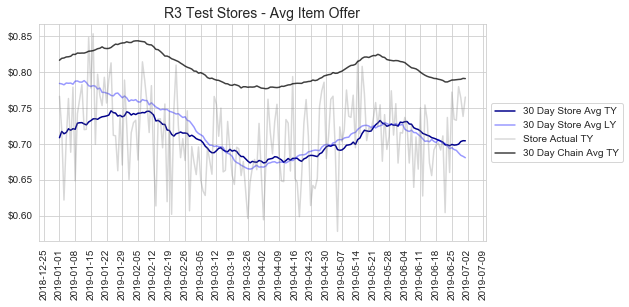

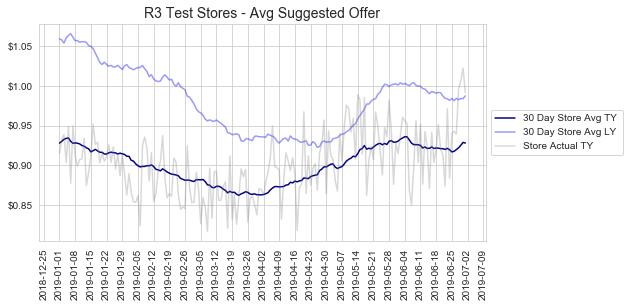

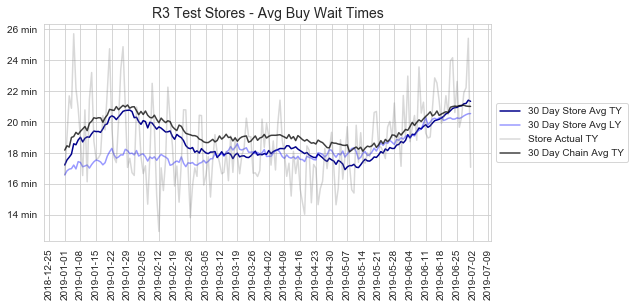

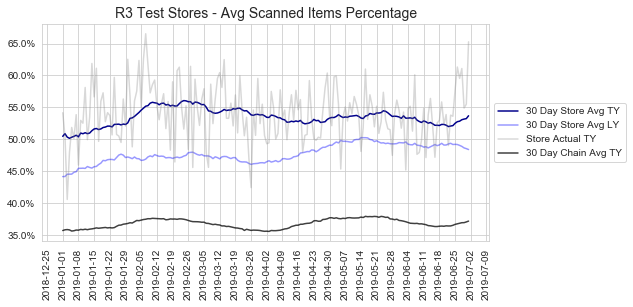

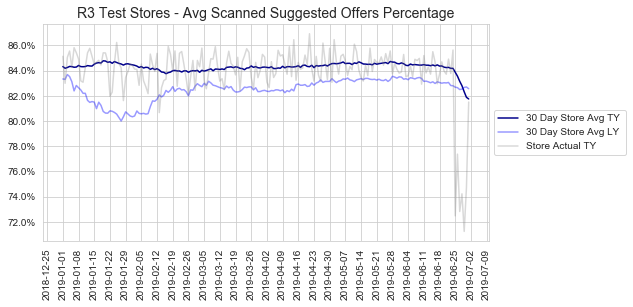

In [8]:
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'BuyOffers', 'BuyItems', 'Item Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'SuggestedOffers', 'SuggestedOfferQuantity', 'Suggested Offer', 
                 '${x:,.2f}', bool_ShowChainAvg=False, bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'BuyWait_Min', 'BuyTransactions', 'Buy Wait Times', 
                 '{x:,.0f} min', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'ScannedQuantity', 'BuyItems', 'Scanned Items Percentage', 
                 '{x:,.1%}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'v1.r3', 'SuggestedOfferQuantity', 'ScannedQuantity', 'Scanned Suggested Offers Percentage', 
                 '{x:,.1%}', bool_ShowChainAvg=False, bool_SaveImgFile=True)

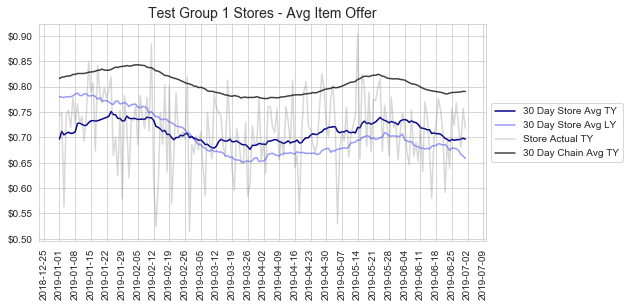

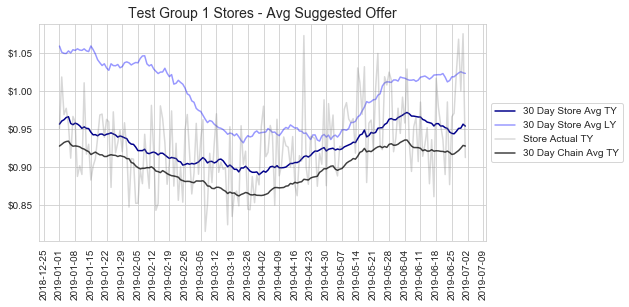

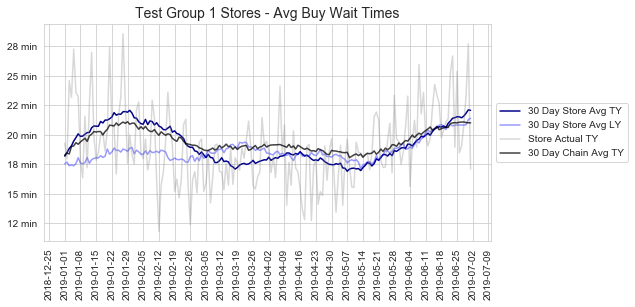

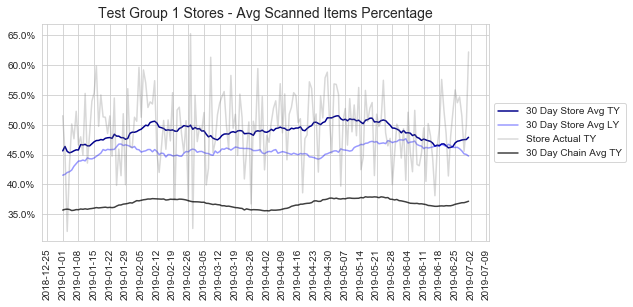

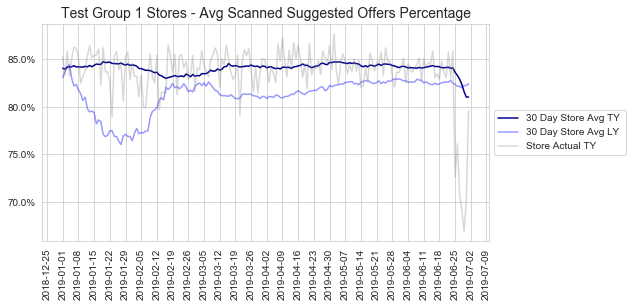

In [9]:
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'BuyOffers', 'BuyItems', 'Item Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'SuggestedOffers', 'SuggestedOfferQuantity', 'Suggested Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'BuyWait_Min', 'BuyTransactions', 'Buy Wait Times', 
                 '{x:,.0f} min', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'ScannedQuantity', 'BuyItems', 'Scanned Items Percentage', 
                 '{x:,.1%}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg1', 'SuggestedOfferQuantity', 'ScannedQuantity', 'Scanned Suggested Offers Percentage', 
                 '{x:,.1%}', bool_ShowChainAvg=False, bool_SaveImgFile=True)

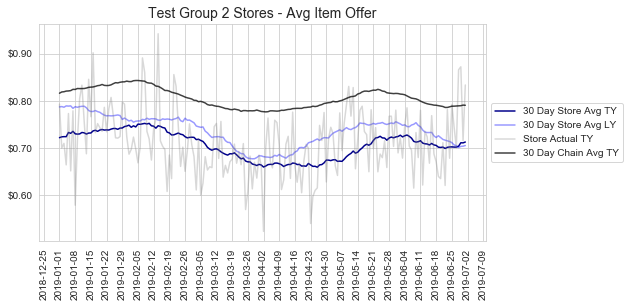

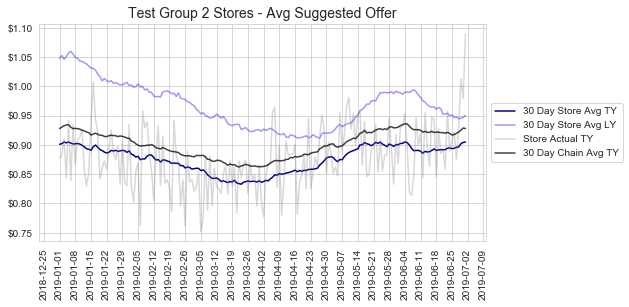

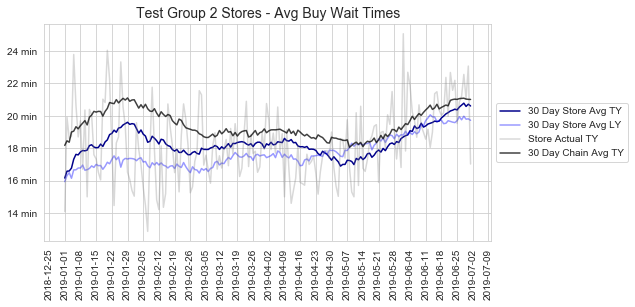

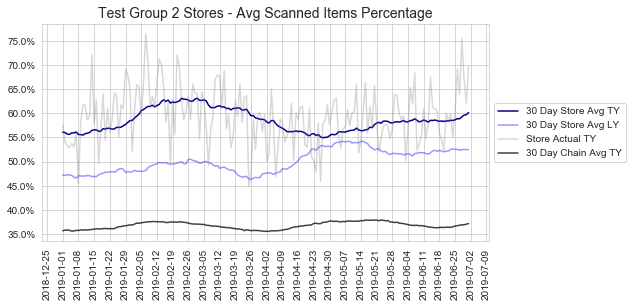

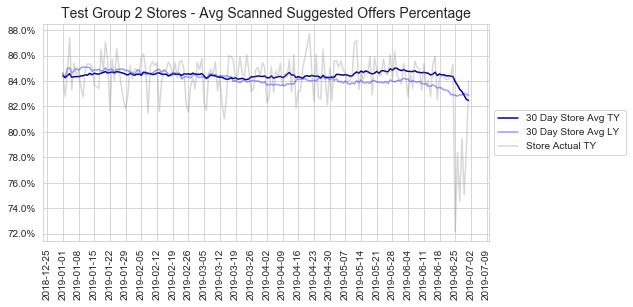

In [10]:
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'BuyOffers', 'BuyItems', 'Item Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'SuggestedOffers', 'SuggestedOfferQuantity', 'Suggested Offer', 
                 '${x:,.2f}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'BuyWait_Min', 'BuyTransactions', 'Buy Wait Times', 
                 '{x:,.0f} min', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'ScannedQuantity', 'BuyItems', 'Scanned Items Percentage', 
                 '{x:,.1%}', bool_SaveImgFile=True)
timeplot_AvgComp(df_BuyHeaderMetrics, 'tg2', 'SuggestedOfferQuantity', 'ScannedQuantity', 'Scanned Suggested Offers Percentage', 
                 '{x:,.1%}', bool_ShowChainAvg=False, bool_SaveImgFile=True)

## Chart Percentages of Chain-Based Offers Vs. Location-Based

In [11]:
NoCalcColumns = ['BusinessDate', 'LocationNo', 'VersionNo', 'TestGroup', 'BuyType']
CalcColumns = [c for c in df_BuyHeaderMetrics.columns if c not in NoCalcColumns]

In [12]:
def get_SummaryStatsAroundDate(df, date, LocName, CalcColumns):
    SumAroundDate = date
    filt_SelectGroup = df['LocationNo'] == LocName
    filt_SumAfterDate = (df['BusinessDate'] >= SumAroundDate) & filt_SelectGroup
    filt_SumBeforeDate = (df['BusinessDate'] < SumAroundDate) & filt_SelectGroup
    series_BeforeDate = df[filt_SumBeforeDate][CalcColumns].sum()
    series_AfterDate = df[filt_SumAfterDate][CalcColumns].sum()
    return series_BeforeDate, series_AfterDate

def get_EachStoreSummaryStatsAfterDate(df, date, list_locs):
    SumAfterDate = date
    filt_SelectGroup = df['LocationNo'].isin(list_locs)
    filt_SumAfterDate = (df['BusinessDate'] >= date) & filt_SelectGroup
    df_AfterDate = df[filt_SumAfterDate].groupby('LocationNo').sum()
    df_AfterDate['TestGroup'] = df[filt_SumAfterDate].groupby('LocationNo').last()['TestGroup']
    return df_AfterDate

In [13]:
series_AllBeforeDate, series_AllAfterDate = get_SummaryStatsAroundDate(df_BuyHeaderMetrics, '2019-06-25', 'v1.r3', CalcColumns)
series_TG1BeforeDate, series_TG1AfterDate = get_SummaryStatsAroundDate(df_BuyHeaderMetrics, '2019-06-25', 'tg1', CalcColumns)
series_TG2BeforeDate, series_TG2AfterDate = get_SummaryStatsAroundDate(df_BuyHeaderMetrics, '2019-06-25', 'tg2', CalcColumns)

In [14]:
list_CompChainLoc_All = np.array([series_AllAfterDate['count_SuggestedOfferChain'], 
                     series_AllAfterDate['count_SuggestedOfferLoc']])
list_CompChainLocAdj_All = np.array([series_AllAfterDate['count_SuggestedOfferChainAdj'], 
                     series_AllAfterDate['count_SuggestedOfferLocAdj']])
list_CompChainLocNestedAdj_All = np.array([[list_CompChainLoc_All[0]-list_CompChainLocAdj_All[0], 
                                            list_CompChainLocAdj_All[0]],
                                            [list_CompChainLoc_All[1]-list_CompChainLocAdj_All[1], 
                                            list_CompChainLocAdj_All[1]]])

list_CompChainLoc_TG1 = np.array([series_TG1AfterDate['count_SuggestedOfferChain'], 
                     series_TG1AfterDate['count_SuggestedOfferLoc']])
list_CompChainLocAdj_TG1 = np.array([series_TG1AfterDate['count_SuggestedOfferChainAdj'], 
                     series_TG1AfterDate['count_SuggestedOfferLocAdj']])
list_CompChainLocNestedAdj_TG1 = np.array([[list_CompChainLoc_TG1[0]-list_CompChainLocAdj_TG1[0], 
                                            list_CompChainLocAdj_TG1[0]],
                                            [list_CompChainLoc_TG1[1]-list_CompChainLocAdj_TG1[1], 
                                            list_CompChainLocAdj_TG1[1]]])

list_CompChainLoc_TG2 = np.array([series_TG2AfterDate['count_SuggestedOfferChain'], 
                     series_TG2AfterDate['count_SuggestedOfferLoc']])
list_CompChainLocAdj_TG2 = np.array([series_TG2AfterDate['count_SuggestedOfferChainAdj'], 
                     series_TG2AfterDate['count_SuggestedOfferLocAdj']])
list_CompChainLocNestedAdj_TG2 = np.array([[list_CompChainLoc_TG2[0]-list_CompChainLocAdj_TG2[0], 
                                            list_CompChainLocAdj_TG2[0]],
                                            [list_CompChainLoc_TG2[1]-list_CompChainLocAdj_TG2[1], 
                                            list_CompChainLocAdj_TG2[1]]])

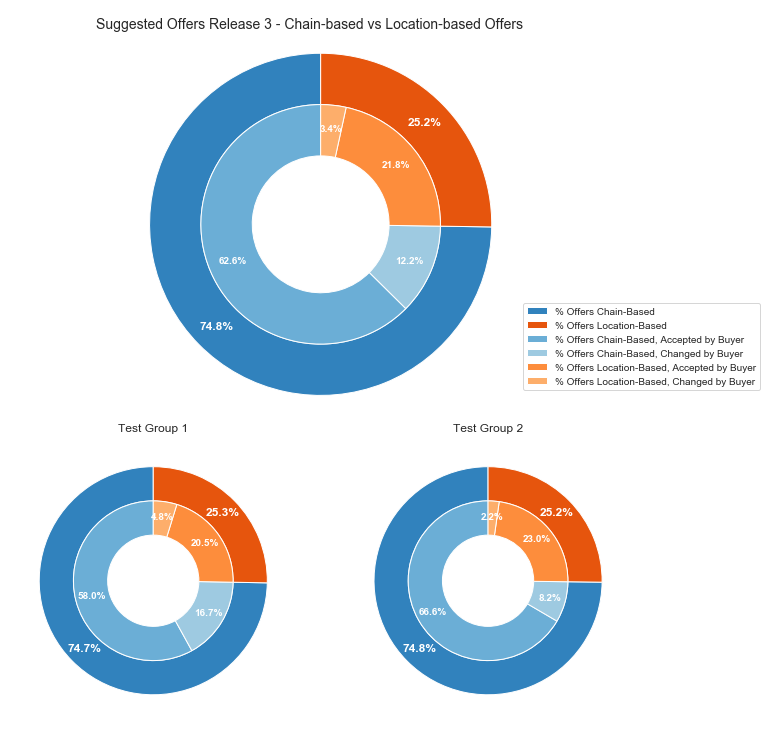

In [15]:
fig = plt.figure(figsize=(12,10))



ax1 = plt.subplot2grid((5, 4), (0, 0),  rowspan=3, colspan=4)
ax2 = plt.subplot2grid((5, 4), (3, 0),  rowspan=2, colspan=2)
ax3 = plt.subplot2grid((5, 4), (3, 2),  rowspan=2, colspan=2)
fig.subplots_adjust(top=.99, bottom=0, hspace=0, wspace=0)

PieWidth = 0.3
list_OuterPieLabels = ['% Offers Chain-Based', '% Offers Location-Based']
list_InnerPieLabels = ['% Offers Chain-Based, Accepted by Buyer', '% Offers Chain-Based, Changed by Buyer', 
                       '% Offers Location-Based, Accepted by Buyer', '% Offers Location-Based, Changed by Buyer']

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))


ax1.pie(list_CompChainLoc_All, labels=None, autopct='%1.1f%%', 
       radius=1, startangle=90, pctdistance=0.85, colors=outer_colors,
       wedgeprops=dict(width=PieWidth, edgecolor='w'), textprops=dict(color='w', fontsize=12, fontweight='bold'))


ax1.pie(list_CompChainLocNestedAdj_All.flatten(), labels=None, 
       autopct='%1.1f%%', radius=1-PieWidth, startangle=90, pctdistance=0.8, colors=inner_colors,
       wedgeprops=dict(width=PieWidth, edgecolor='w'), 
       textprops=dict(color='w', fontsize=10, fontweight='bold', rotation=0))

ax1.legend(labels=list_OuterPieLabels + list_InnerPieLabels, loc="lower center",
           bbox_to_anchor=(1, 0.1, 0.5, 1))


ax2.pie(list_CompChainLoc_TG1, labels=None, autopct='%1.1f%%', 
       radius=1, startangle=90, pctdistance=0.85, colors=outer_colors,
       wedgeprops=dict(width=PieWidth, edgecolor='w'), textprops=dict(color='w', fontsize=12, fontweight='bold'))


ax2.pie(list_CompChainLocNestedAdj_TG1.flatten(), labels=None, 
       autopct='%1.1f%%', radius=1-PieWidth, startangle=90, pctdistance=0.8, colors=inner_colors,
       wedgeprops=dict(width=PieWidth, edgecolor='w'), 
       textprops=dict(color='w', fontsize=10, fontweight='bold', rotation=0))
ax2.set_title('Test Group 1')



ax3.pie(list_CompChainLoc_TG2, labels=None, autopct='%1.1f%%', 
       radius=1, startangle=90, pctdistance=0.85, colors=outer_colors,
       wedgeprops=dict(width=PieWidth, edgecolor='w'), textprops=dict(color='w', fontsize=12, fontweight='bold'))


ax3.pie(list_CompChainLocNestedAdj_TG2.flatten(), labels=None, 
       autopct='%1.1f%%', radius=1-PieWidth, startangle=90, pctdistance=0.8, colors=inner_colors,
       wedgeprops=dict(width=PieWidth, edgecolor='w'), 
       textprops=dict(color='w', fontsize=10, fontweight='bold', rotation=0))
ax3.set_title('Test Group 2')

plt.suptitle('Suggested Offers Release 3 - Chain-based vs Location-based Offers', fontsize=14)

plt.show()

## Chart Percentage of Location-Based Offers By Store

In [16]:
filt_V1R3Locs = df_BuyHeaderMetrics['VersionNo'] == 'v1.r3'
list_R3Locs = list(df_BuyHeaderMetrics[filt_V1R3Locs]['LocationNo'].unique())
list_R3Locs = [i for i in list_R3Locs if i not in ['tg1', 'tg2']]

In [17]:
df_PctLocOffers = get_EachStoreSummaryStatsAfterDate(df_BuyHeaderMetrics, '2019-06-25', 
                                                     list_R3Locs).reset_index()
df_PctLocOffers['pct_LocOffers'] = df_PctLocOffers['count_SuggestedOfferLoc']/df_PctLocOffers['total_SuggestedOfferQuantity']

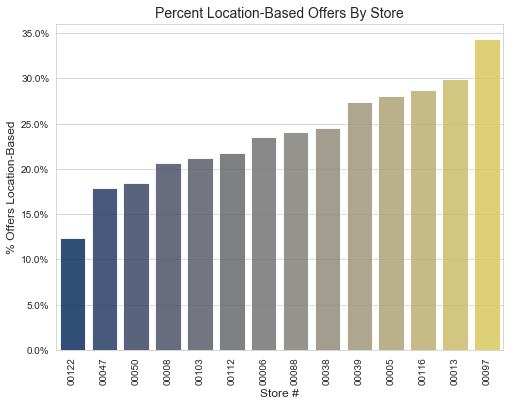

In [18]:
sns.set_style('whitegrid')
list_PlotOrder = df_PctLocOffers.sort_values('pct_LocOffers')['LocationNo'].to_list()

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='LocationNo', y='pct_LocOffers', data=df_PctLocOffers, ax=ax, 
            order=list_PlotOrder, palette = 'cividis', alpha = 0.85)
#ax.set_axisbelow(False)
#ax.grid(axis='y', color='white')
plt.xticks(rotation=90)
ax.set_xlabel('Store #', fontsize=12)
ax.set_ylabel('% Offers Location-Based', fontsize=12)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.1%}')) 
plt.title('Percent Location-Based Offers By Store', fontsize=14)
plt.show()

In [19]:
filt_V1R3Locs = df_BuyHeaderMetrics['VersionNo'] == 'v1.r3'
list_R3Locs = list(df_BuyHeaderMetrics[filt_V1R3Locs]['LocationNo'].unique())

In [20]:
list_R3Locs = [i for i in list_R3Locs if i not in ['tg1', 'tg2']]

In [21]:
df_AdjOffers = get_EachStoreSummaryStatsAfterDate(df_BuyHeaderMetrics, '2019-06-25', list_R3Locs).reset_index()
df_AdjOffers['pct_LocOffers'] = (df_AdjOffers['total_SuggestedOfferAdjustedItems']/
                                    df_AdjOffers['total_SuggestedOfferQuantity'])


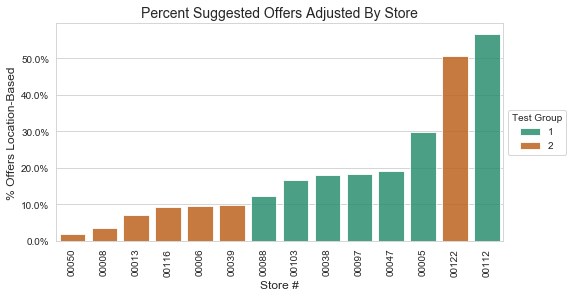

In [24]:
sns.set_style('whitegrid')
list_PlotOrder = df_AdjOffers.sort_values('pct_LocOffers')['LocationNo'].to_list()

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='LocationNo', y='pct_LocOffers', data=df_AdjOffers, ax=ax, 
            order=list_PlotOrder, palette = 'Dark2', hue='TestGroup', dodge=False, alpha = 0.85)
#ax.set_axisbelow(False)
#ax.grid(axis='y', color='white')
plt.xticks(rotation=90)
ax.set_xlabel('Store #', fontsize=12)
ax.set_ylabel('% Offers Location-Based', fontsize=12)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.1%}')) 


handles, labels = ax.get_legend_handles_labels()
fmt_labels = []  
for s in labels:
    fmt_labels.append('{:.0f}'.format(float(s)))

ax.legend(handles, fmt_labels, title='Test Group', loc="center left", bbox_to_anchor=(1, 0, 0, 1))



plt.title('Percent Suggested Offers Adjusted By Store', fontsize=14)
plt.show()

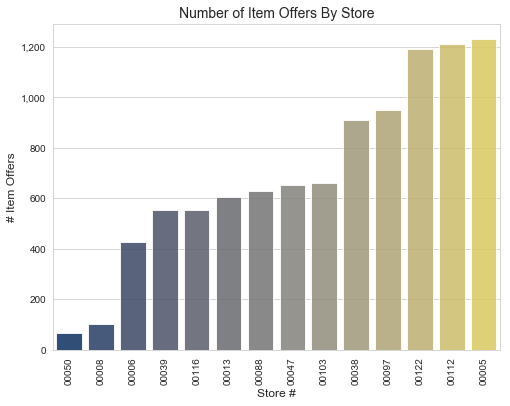

In [23]:
sns.set_style('whitegrid')
list_PlotOrder = df_AdjOffers.sort_values('total_SuggestedOfferAdjustedItems')['LocationNo'].to_list()

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='LocationNo', y='total_SuggestedOfferAdjustedItems', data=df_AdjOffers, ax=ax, 
            order=list_PlotOrder, palette = 'cividis', alpha = 0.85)
#ax.set_axisbelow(False)
#ax.grid(axis='y', color='white')
plt.xticks(rotation=90)
ax.set_xlabel('Store #', fontsize=12)
ax.set_ylabel('# Item Offers', fontsize=12)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) 
plt.title('Number of Item Offers By Store', fontsize=14)
plt.show()